## [빅데이터 분석을 위한 통계 이론]
#### 1. 유클리디안 거리, 코사인 유사도 및 거리에 대해 설명하시오. (코드를 예로 들어서)
#### 2. 표준화와 정규화에 대해 정의하고, 수식에 대해 설명하시오(코드를 예로 들어서)

In [ ]:
'''
1. 유클리디안 거리, 코사인 유사도 및 거리에 대해 설명하시오. (코드를 예로 들어서)

- 유클리디안 거리: n차원의 공간에서 두 점간의 거리를 알아내는 공식

- 코사인 유사도: 두 벡터간의 코사인 각도를 이용하여 구할 수 있는 유사도. 
                평행이며 방향이 같으면 유사도 1, 다르면 -1 / 서로 직교하면 0으로 표현함.
'''

In [16]:
# ex) 유클리디안
import pandas as pd
import numpy as np

A=[1,2,3]
A_arr=np.array(A)
B=[7,7,7]
B_arr=np.array(B)

def euclidian(x,y):
    return np.sqrt(sum(x-y)**2)

euclidian(A_arr,B_arr)

15.0

In [17]:
# 코사인 유사도
def cos_similarity(x,y):
    dot_prod = np.dot(x,y)
    xy_norm = (np.sqrt(sum(np.square(x)))*np.sqrt(sum(np.square(y))))
    similarity = dot_prod / xy_norm
    return similarity

cos_similarity(A_arr,B_arr)

0.9258200997725515

In [ ]:
'''
2. 표준화와 정규화에 대해 정의, 수식에 대해 설명

- 표준화: 서로 다른 정규분포 사이에 비교를 하거나, 특정 정규분포를 토대로 하여 통계적 추정 등의 
         분석작업을 해야 할 때, 필요에 따라 정규분포의 분산과 표준편차를 표준에 맞게 통일시키는 것.
         표준화를 하면 정규분포의 최고점으로부터 얼마나 데이터가 떨어져있는지 분포를 확인할 수 있다.
        
- 정규화: 관계형 데이터베이스의 설계에서 중복을 최소화하게 데이터를 구조화하는 프로세스. 
         서로 다른 범위를 가진 데이터들의 범위를 동일하게 하여 상대적인 크기 차이를 제거한다. 
         특정한 분포(ex. 정규분포)들의 평균과 분산 혹은 표준편차를 이용해 “속성값-평균/표준편차”로 
         해당 분포에서의 이 속성값이 평균으로부터의 위치를 표준편차 단위로 옮겨서 다시 나타낸 것이라고 할 수 있다.
'''

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
A={
    'rank':[1,3,5,6,7],
    'points':[40,50,70,98,100],
    'rank*points':[40,150,350,588,700]
    }
df = pd.DataFrame(A,index=['a','b','c','d','e'])
df

,rank,points,rank*points
a,1,40,40
b,3,50,150
c,5,70,350
d,6,98,588
e,7,100,700


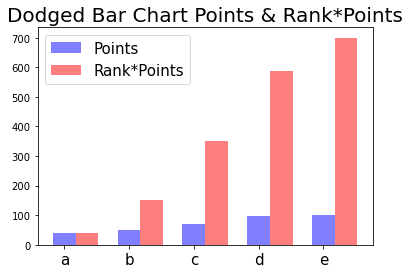

In [58]:
label = ['a', 'b', 'c', 'd', 'e']
bar_width=0.35
alpha=0.5
p1=plt.bar(index,df['points'],bar_width,color='b',alpha=alpha,label='Points')
p2=plt.bar(index+bar_width,df['rank*points'],bar_width,color='r',alpha=alpha,label='Rank*Points')
plt.title('Dodged Bar Chart Points & Rank*Points', fontsize=20)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0]), ('Points', 'Rank*Points'), fontsize=15)
plt.show()

In [ ]:
# 상기 그림과 같이 표준화나 정규화를 하지 않으면 데이터의 종류에 따라 편차가 굉장히 크게 나타난다. 
# 따라서 데이터를 판별하기 힘들다. 이를 해결하기 위해 표준화, 정규화를 진행한다.

In [70]:
# 표준화를 통해 평균에서 얼마나 떨어졌는지 가시적으로 확인이 가능하다.
# 각 데이터에서 평균을 뺀 값을 각 열의 표준편차로 나누어 준다.
import sklearn
from sklearn.preprocessing import *

points_scaled = StandardScaler().fit_transform(df['points'][:,np.newaxis])
points_scaled

[[-1.29630185]
 [-0.88607975]
 [-0.06563554]
 [ 1.08298636]
 [ 1.16503078]]


In [80]:
# 정규화
# 각 데이터에서 최솟값을 뺀 값을 최댓값-최솟값으로 나누어 준다.
import sklearn
from sklearn.preprocessing import *

rank_points_scaled = MinMaxScaler().fit_transform(df['rank*points'][:,np.newaxis])
rank_points_scaled

array([[0.        ],
       [0.16666667],
       [0.46969697],
       [0.83030303],
       [1.        ]])

## 실습 예제
#### [파이썬 분석 및 시각화 라이브러리]
#### 1. 타이타닉 데이터에 대해 아래와 같은 작업을 수행하시오.
#### 1) Pclass를 원핫인코딩
#### 2) Age를 이산화(5개 구간으로 나눔)
#### 3) embarked를 원핫인코딩

#### 2. bins = [5, 20, 30, 40, 60, 90]
#### labels = ["미성년자", "청년", "중년", "장년", "노년"]
#### 타이타닉호 승객을 사망자와 생존자 그룹으로 나누고 각 그룹에 대해 '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구한다. 각 그룹 별로 비율의 전체 합은 1이 되어야 한다.

In [84]:
# 1.1) Pclass를 원 핫 인코딩
train=pd.read_csv("train.csv")
print(train.shape)
test=pd.read_csv("test.csv")
test.shape

(891, 12)


(418, 11)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [96]:
ohe=OneHotEncoder()
Pclass_ohe = ohe.fit_transform(train['Pclass'][:,np.newaxis]).toarray()
Pclass_ohe

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [106]:
train['Age']=train['Age'].dropna()

In [107]:
# 2) Age를 이산화(5개 구간으로 나눔) - pd.qcut 활용
pd.qcut(train['Age'],5,)

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [ ]:
# 3) embarked를 원핫인코딩

In [136]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Embarked_dropna  889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
train['Embarked'].replace(np.nan,)

In [162]:
train['Embarked_dropna']=train['Embarked'].dropna()
train['Embarked_dropna'].isnull().sum()

2

In [186]:
train['Embarked_ffill'] = train['Embarked'].ffill
train['Embarked_ffill'].isnull().sum()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Embarked_dropna  889 non-null    object 
 13  Embarked_ffill   891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [202]:
le=LabelEncoder()
Embarked_le = le.fit_transform(train['Embarked_ffill'][:,np.newaxis])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['method']

In [166]:
ohe=OneHotEncoder()
Embarked_ohe = ohe.fit_transform(train['Embarked_ffill'][:,np.newaxis]).toarray()
Embarked_ohe

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['method']

In [198]:
# 2. 타이타닉호 사망자 생존자 그룹으로 나누고 각 그룹에 대해 비율 구해. 각 그룹별 전체합은 1
bins=[5,20,30,40,60,90]
labels=['미성년자','청년','중년','장년','노년']

In [199]:
train['Age_Group']=pd.cut(train['Age'], bins=bins, labels=labels)

In [201]:
age_group = pd.DataFrame(train.groupby('Survived')['Age_Group'].value_counts())
age_group.columns=['Counts']
age_group['Ratio'] = round(age_group / age_group.sum(axis=0, level=0),2)
age_group

Counts  Ratio
Survived Age_Group               
0        청년            146   0.36
         중년             86   0.21
         미성년자           84   0.20
         장년             78   0.19
         노년             17   0.04
1        청년             84   0.32
         중년             69   0.27
         미성년자           51   0.20
         장년             50   0.19
         노년              5   0.02